In [1]:
# Multilayer Perceptron to Predict International Airline Passengers (t+1, given t)
import numpy
import matplotlib.pyplot as plt
from pandas import read_csv
import math
from keras.models import Sequential
from keras.layers import Dense

Using TensorFlow backend.


In [2]:
# convert an array of values into a dataset matrix
def create_dataset(dataset, look_back=1):
	dataX, dataY = [], []
	for i in range(len(dataset)-look_back-1):
		a = dataset[i:(i+look_back), 0]
		dataX.append(a)
		dataY.append(dataset[i + look_back, 0])
	return numpy.array(dataX), numpy.array(dataY)



In [3]:
# fix random seed for reproducibility
numpy.random.seed(7)
# load the dataset
dataframe = read_csv('international-airline-passengers.csv', usecols=[1], engine='python', skipfooter=3)
dataset = dataframe.values
dataset = dataset.astype('float32')
# split into train and test sets
train_size = int(len(dataset) * 0.67)
test_size = len(dataset) - train_size
train, test = dataset[0:train_size,:], dataset[train_size:len(dataset),:]


In [4]:
# reshape into X=t and Y=t+1
look_back = 1
trainX, trainY = create_dataset(train, look_back)
testX, testY = create_dataset(test, look_back)
# create and fit Multilayer Perceptron model
model = Sequential()
model.add(Dense(8, input_dim=look_back, activation='relu'))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(trainX, trainY, epochs=200, batch_size=2, verbose=2)


Epoch 1/200
0s - loss: 47564.3306
Epoch 2/200
0s - loss: 41661.6425
Epoch 3/200
0s - loss: 35716.0513
Epoch 4/200
0s - loss: 29513.3656
Epoch 5/200
0s - loss: 23431.0047
Epoch 6/200
0s - loss: 17731.5653
Epoch 7/200
0s - loss: 12784.6238
Epoch 8/200
0s - loss: 8686.7740
Epoch 9/200
0s - loss: 5589.7633
Epoch 10/200
0s - loss: 3435.0430
Epoch 11/200
0s - loss: 2068.3067
Epoch 12/200
0s - loss: 1290.1046
Epoch 13/200
0s - loss: 867.2134
Epoch 14/200
0s - loss: 675.0417
Epoch 15/200
0s - loss: 585.1584
Epoch 16/200
0s - loss: 555.1250
Epoch 17/200
0s - loss: 546.7024
Epoch 18/200
0s - loss: 547.3951
Epoch 19/200
0s - loss: 538.8367
Epoch 20/200
0s - loss: 538.5331
Epoch 21/200
0s - loss: 536.9803
Epoch 22/200
0s - loss: 536.0266
Epoch 23/200
0s - loss: 537.1223
Epoch 24/200
0s - loss: 535.7814
Epoch 25/200
0s - loss: 538.2075
Epoch 26/200
0s - loss: 538.4697
Epoch 27/200
0s - loss: 538.2268
Epoch 28/200
0s - loss: 537.3782
Epoch 29/200
0s - loss: 538.2795
Epoch 30/200
0s - loss: 539.0510


In [5]:
# Estimate model performance
trainScore = model.evaluate(trainX, trainY, verbose=0)
print('Train Score: %.2f MSE (%.2f RMSE)' % (trainScore, math.sqrt(trainScore)))
testScore = model.evaluate(testX, testY, verbose=0)
print('Test Score: %.2f MSE (%.2f RMSE)' % (testScore, math.sqrt(testScore)))


Train Score: 531.71 MSE (23.06 RMSE)
Test Score: 2355.07 MSE (48.53 RMSE)


In [6]:
# generate predictions for training
trainPredict = model.predict(trainX)
testPredict = model.predict(testX)


In [7]:
# shift train predictions for plotting
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back*2)+1:len(dataset)-1, :] = testPredict


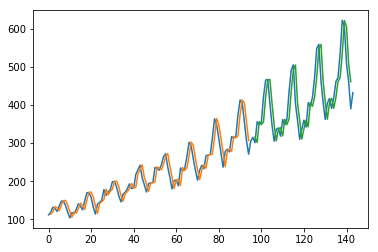

In [8]:
# plot baseline and predictions
plt.plot(dataset)
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()
